In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('US Immigration Statistics (Ver 1.7.23).csv')
print(df.head())
print(df.dtypes)

   Year Immigrants Obtaining Lawful Permanent Resident Status  \
0  1980                                           524,295       
1  1981                                           595,014       
2  1982                                           533,624       
3  1983                                           550,052       
4  1984                                           541,811       

  Refugee Arrivals Noncitizen Apprehensions Noncitizen Removals  \
0         207,116                   910,361              18,013   
1         159,252                   975,780              17,379   
2          98,096                   970,246              15,216   
3          61,218                 1,251,357              19,211   
4          70,393                 1,246,981              18,696   

  Noncitizen Returns  
0            719,211  
1            823,875  
2            812,572  
3            931,600  
4            909,833  
Year                                                      int64
Immi

It appears that several columns that should be numeric are currently stored as objects, likely due to the presence of commas in the numbers. I'll clean these columns by removing commas and converting them to integers. After cleaning, I'll provide a summary of the data to ensure everything is in order before proceeding with visualization and regression analysis.

In [3]:
# Remove commas and convert columns to integers
columns_to_convert = ['Immigrants Obtaining Lawful Permanent Resident Status', 'Refugee Arrivals', 'Noncitizen Apprehensions', 'Noncitizen Removals', 'Noncitizen Returns']
for column in columns_to_convert:
    df[column] = df[column].str.replace(',', '').astype(int)

print(df.head())
print(df.describe())

   Year  Immigrants Obtaining Lawful Permanent Resident Status  \
0  1980                                             524295       
1  1981                                             595014       
2  1982                                             533624       
3  1983                                             550052       
4  1984                                             541811       

   Refugee Arrivals  Noncitizen Apprehensions  Noncitizen Removals  \
0            207116                    910361                18013   
1            159252                    975780                17379   
2             98096                    970246                15216   
3             61218                   1251357                19211   
4             70393                   1246981                18696   

   Noncitizen Returns  
0              719211  
1              823875  
2              812572  
3              931600  
4              909833  
              Year  Immigrants Obtaini

1. **Time Series Plot** for each of the immigration-related metrics over the years. This will help us see trends over time.
2. **Bar Graphs** for the total counts of each metric to compare their magnitudes directly.


In [4]:
# Create a dictionary with year as key and president/party information as values
data = {
    'Year': range(1980, 2021),  # Years from 1980 to 2020 (inclusive)
    'President': [
        'Ronald Reagan' for y in range(1980, 1989)
    ] + [
        'George H.W. Bush' for y in range(1989, 1993)
    ] + [
        'Bill Clinton' for y in range(1993, 2001)
    ] + [
        'George W. Bush' for y in range(2001, 2009)
    ] + [
        'Barack Obama' for y in range(2009, 2017)
    ] + [
        'Donald Trump' for y in range(2017, 2021)
    ],
    'Party': [
        'Republican' for y in range(1980, 1989)
    ] + [
        'Republican' for y in range(1989, 1993)
    ] + [
        'Democratic' for y in range(1993, 2001)
    ] + [
        'Republican' for y in range(2001, 2009)
    ] + [
        'Democratic' for y in range(2009, 2017)
    ] + [
        'Republican' for y in range(2017, 2021)
    ]
}

# Create the DataFrame from the dictionary
df1 = pd.DataFrame(data)

In [5]:
df = pd.merge(df, df1, on='Year', how='left')


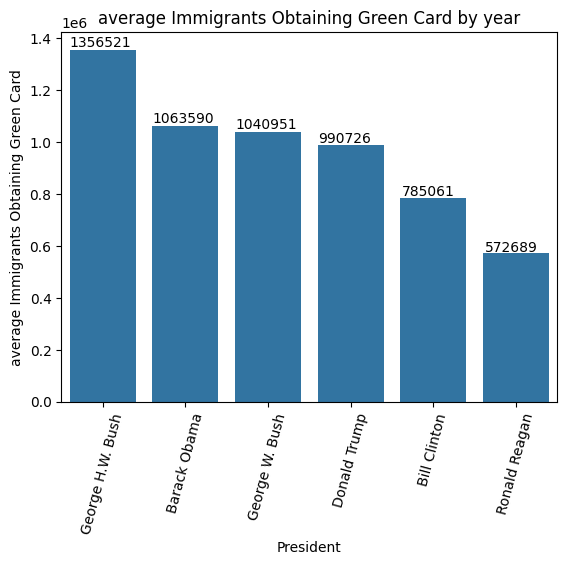

In [6]:
green_cards_by_person = pd.DataFrame(df.groupby('President')['Immigrants Obtaining Lawful Permanent Resident Status'].sum())

green_cards_by_person['year_count'] =  df.groupby('President')['Party'].count()
green_cards_by_person['average Immigrants Obtaining Green Card'] = green_cards_by_person['Immigrants Obtaining Lawful Permanent Resident Status']/green_cards_by_person['year_count']
green_cards_by_person =green_cards_by_person.sort_values(by='average Immigrants Obtaining Green Card',ascending=False)
# Plot the comparison
ax = sns.barplot(x =  green_cards_by_person.index, y = green_cards_by_person['average Immigrants Obtaining Green Card'])
ax.set_title('average Immigrants Obtaining Green Card by year')
plt.xticks(rotation=75)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.009))


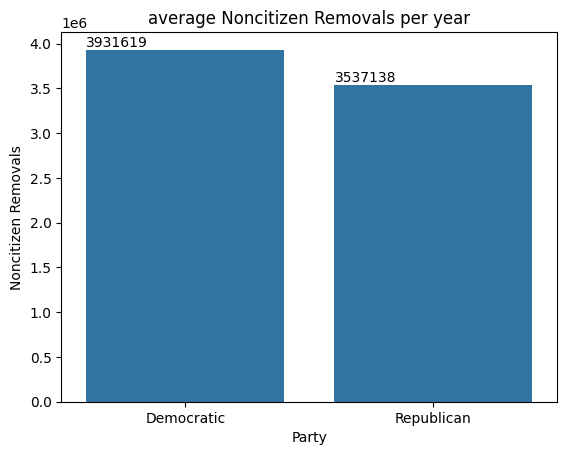

In [7]:
# Which Party removed more non-citizens
Noncitizen_Removals_by_party = pd.DataFrame(df.groupby('Party')['Noncitizen Removals'].sum())

Noncitizen_Removals_by_party['year_count'] =  df.groupby('Party')['Party'].count()
Noncitizen_Removals_by_party['average Noncitizen Removals'] = Noncitizen_Removals_by_party['Noncitizen Removals']/green_cards_by_person['year_count']

# Plot the comparison
ax = sns.barplot(x =  Noncitizen_Removals_by_party.index, y = Noncitizen_Removals_by_party['Noncitizen Removals'])
ax.set_title('average Noncitizen Removals per year')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.009))

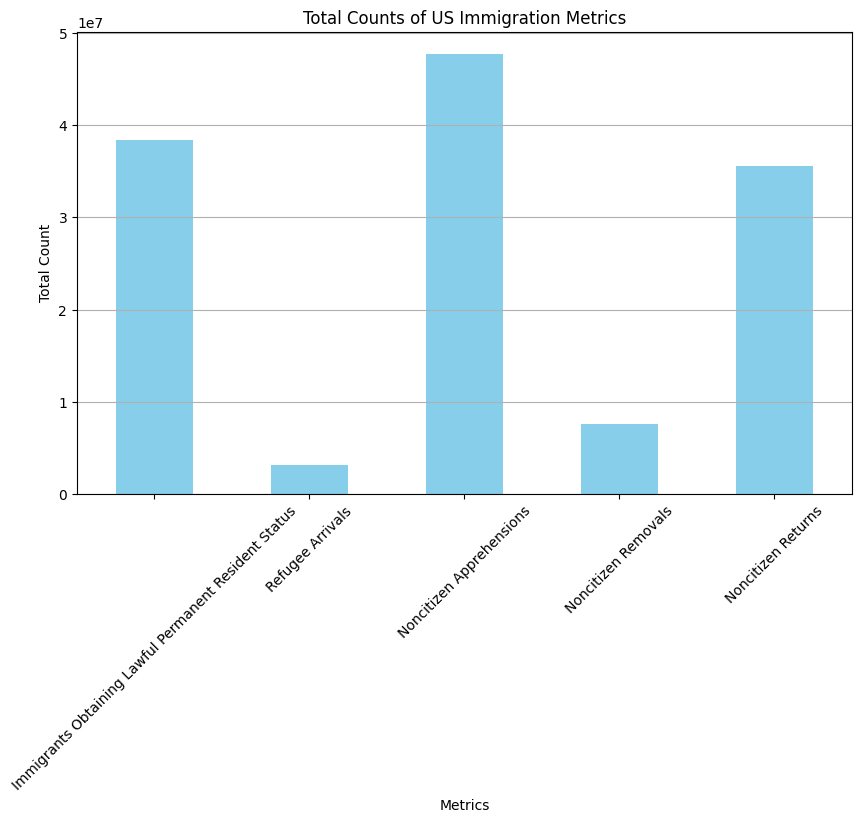

In [8]:
plt.figure(figsize=(10, 6), facecolor='white')

total_counts = df[columns_to_convert].sum()
total_counts.plot(kind='bar', color='skyblue')

plt.title('Total Counts of US Immigration Metrics')
plt.ylabel('Total Count')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

These visualizations provide a clear overview of the trends and comparisons among different immigration metrics. Next, we can proceed with preparing the data for regression analysis. Would you like to specify any particular variables for the regression model, or should I proceed with a general model involving all metrics?

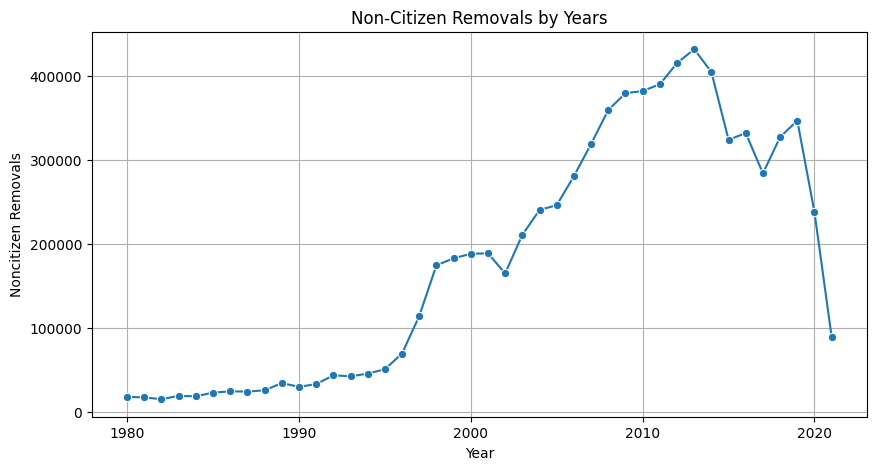

In [9]:
import seaborn as sns

plt.figure(figsize=(10, 5), facecolor='white')
ax = sns.lineplot(data=df, x='Year', y='Noncitizen Removals', marker='o')
ax.set_title('Non-Citizen Removals by Years')
ax.set_xlabel('Year')
ax.set_ylabel('Noncitizen Removals')
ax.grid(True)
plt.show()

This plot provides a detailed view of the trends in Non-Citizen Removals over the years. If you have any more specific analyses or another metric you'd like to explore, feel free to let me know!

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features and target
X = df[['Year']]  # Feature
y = df['Noncitizen Removals']  # Target

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model building
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

rmse = np.sqrt(mse)

print('Root Mean Squared Error:', rmse)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Root Mean Squared Error: 65390.125419747
Mean Squared Error: 4275868502.4102426
R-squared: 0.7896917968062869


- **Mean Squared Error (MSE):** 4275868502.41
- **R-squared:** 0.7897

These metrics indicate that the model explains about 78.97% of the variance in Noncitizen Removals based on the year, which is a decent fit for a simple linear model. The MSE provides an idea of the average squared difference between the observed and predicted values.



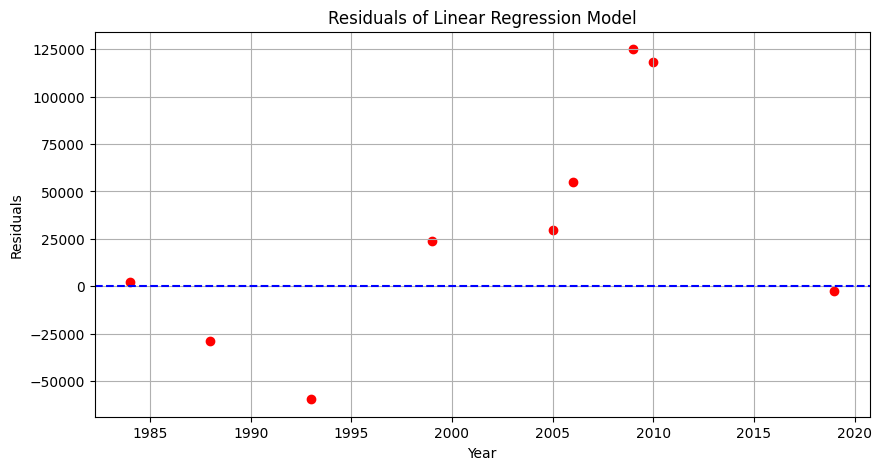

In [11]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 5), facecolor='white')
plt.scatter(X_test, residuals, color='red')
plt.axhline(y=0, color='blue', linestyle='--')
plt.title('Residuals of Linear Regression Model')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

The residuals plot helps in checking the assumption of homoscedasticity in linear regression. Ideally, the residuals should be randomly dispersed around the horizontal axis (blue dashed line). If there are any patterns or systematic structures, it might indicate that the model is not capturing some aspect of the data, suggesting potential improvements or the need for a more complex model.



In [14]:
from sklearn.preprocessing import PolynomialFeatures

# Generating polynomial features
poly = PolynomialFeatures(degree=2)  # Using a quadratic model
X_poly = poly.fit_transform(X)

# Splitting the polynomial data
X_poly_train, X_poly_test, _, _ = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Model building with polynomial features
poly_model = LinearRegression()

# Training the polynomial model
poly_model.fit(X_poly_train, y_train)

# Predicting with the polynomial model
y_poly_pred = poly_model.predict(X_poly_test)

# Evaluating the polynomial model
poly_mse = mean_squared_error(y_test, y_poly_pred)
poly_r2 = r2_score(y_test, y_poly_pred)
poly_rmse = np.sqrt(poly_mse)

print('Polynomial Regression - Mean Squared Error:', poly_mse)
print('Polynomial Regression - Root Mean Squared Error:', poly_rmse)
print('Polynomial Regression - R-squared:', poly_r2)

Polynomial Regression - Mean Squared Error: 3702446641.5613995
Polynomial Regression - Root Mean Squared Error: 60847.733249163844
Polynomial Regression - R-squared: 0.8178954988516463


The polynomial regression model (quadratic) has been trained and evaluated with the following results:

Mean Squared Error (MSE): 3702446641.82
R-squared: 0.8179
These metrics indicate that the polynomial model explains about 81.79% of the variance in Noncitizen Removals based on the year, which is an improvement over the simple linear model. The lower MSE also suggests a better fit to the data.



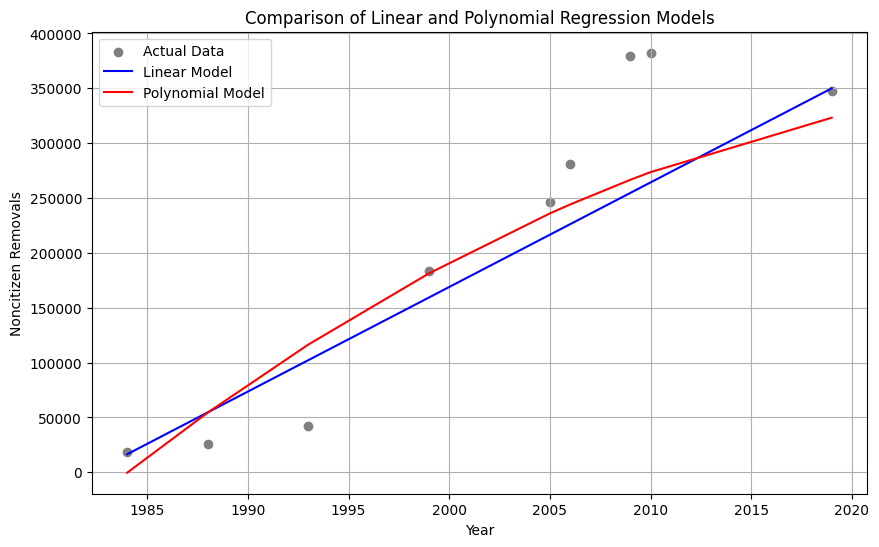

In [13]:
import numpy as np
# Correcting the data handling for plotting
plt.figure(figsize=(10, 6), facecolor='white')

# Sorting for line plot
sort_idx = np.argsort(X_test.iloc[:,0].values)
X_test_sorted = X_test.iloc[sort_idx].values
y_test_sorted = y_test.iloc[sort_idx].values
y_pred_sorted = y_pred[sort_idx]
y_poly_pred_sorted = y_poly_pred[sort_idx]

# Plotting
plt.scatter(X_test, y_test, color='gray', label='Actual Data')
plt.plot(X_test_sorted, y_pred_sorted, color='blue', label='Linear Model')
plt.plot(X_test_sorted, y_poly_pred_sorted, color='red', label='Polynomial Model')

plt.title('Comparison of Linear and Polynomial Regression Models')
plt.xlabel('Year')
plt.ylabel('Noncitizen Removals')
plt.legend()
plt.grid(True)
plt.show()